This program injests data on Avocado prices and aims to visualise and predict the potential price one year in the future.

Key Points / Results:
1. The program uses Facebook's Prophet model which is better suited to predict non linear datasets with weekly and monthly changes. It is perfect for predicting seasonal stuff.
2. The program predicts the seasonality of Avocados with a peak in September.
3. Cannot predict prices as well due to the volatility and large scatter of avocado prices depending on season and overall availability.
4. Overall predictions are off by 23% on average with a mad R^2 error due to a lack of linear fit with the data.

In [1]:
pip install pandas numpy scikit-learn prophet matplotlib seaborn openpyxl

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -------- ------------------------------- 2.6/12.6 MB 13.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.8/12.6 MB 14.1 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.6 MB 13.7 MB/s eta 0:00:01
   ----------------------------------- ---- 11.0/12.6 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 12.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\raeed\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [7]:
def load_data(file_path):
    """
    Load and preprocess the avocado price data from CSV.
    """
    # Load CSV file
    df = pd.read_csv(file_path)
    
    # Convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort by date
    df = df.sort_values('Date')
    
    # Handle missing values
    df = df.dropna(subset=['AveragePrice', 'Total Volume'])
    
    return df

# Load the data
df = load_data('avocado_prices.csv')

# Display basic information about the dataset
print("\nDataset Info:")
print("-------------")
print(f"Number of records: {len(df)}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print("\nColumns in dataset:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())


Dataset Info:
-------------
Number of records: 18249
Date range: 2015-01-04 00:00:00 to 2018-03-25 00:00:00

Columns in dataset:
['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

First few rows:
       Unnamed: 0       Date  AveragePrice  Total Volume     4046      4225  \
11569          51 2015-01-04          1.75      27365.89  9307.34   3844.81   
9593           51 2015-01-04          1.49      17723.17  1189.35  15628.27   
10009          51 2015-01-04          1.68       2896.72   161.68    206.96   
1819           51 2015-01-04          1.52      54956.80  3013.04  35456.88   
9333           51 2015-01-04          1.64       1505.12     1.27   1129.50   

          4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
11569   615.28    13598.46    13061.10      537.36          0.0       organic   
9593      0.00      905.55      905.55        0.00    

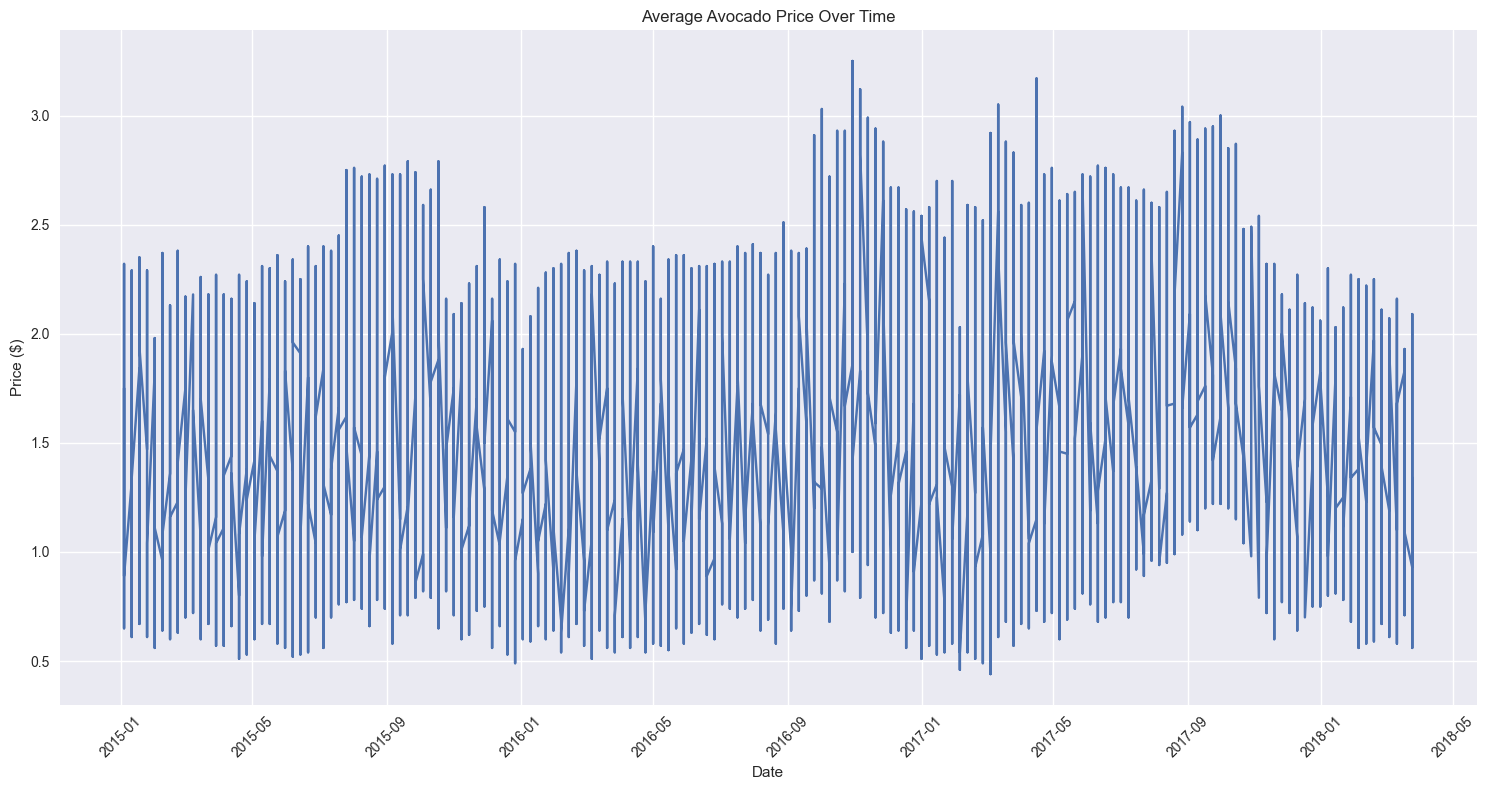

In [ ]:
#Time series plot
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['AveragePrice'])
plt.title('Average Avocado Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

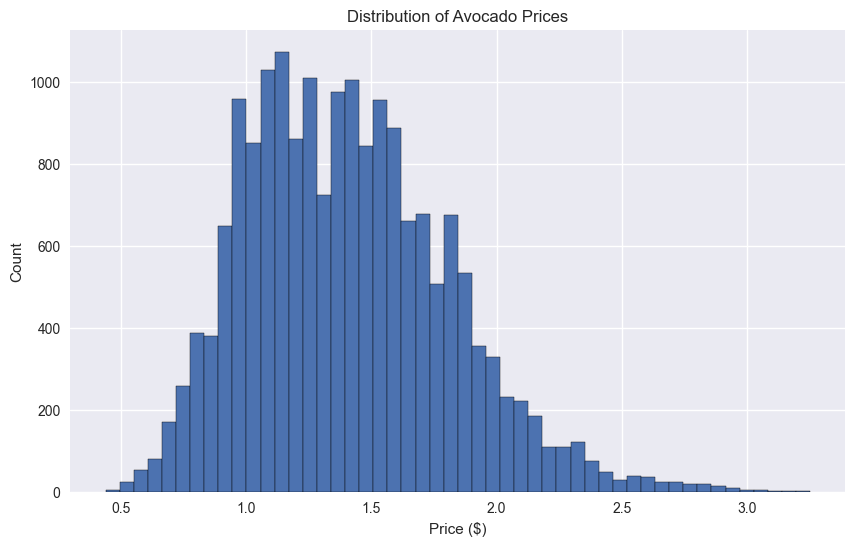

In [ ]:
# Price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['AveragePrice'], bins=50, edgecolor='black')
plt.title('Distribution of Avocado Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [10]:
# Prepare data for Prophet
def prepare_data_for_prophet(df):
    """Prepare data for Prophet model."""
    prophet_data = df[['Date', 'AveragePrice']].copy()
    prophet_data.columns = ['ds', 'y']
    return prophet_data

prophet_data = prepare_data_for_prophet(df)

# Initialize and train Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

model.fit(prophet_data)

08:55:50 - cmdstanpy - INFO - Chain [1] start processing
08:56:00 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Make future predictions
future_periods = 365  # Predict one year ahead
future_dates = model.make_future_dataframe(periods=future_periods)
predictions = model.predict(future_dates)

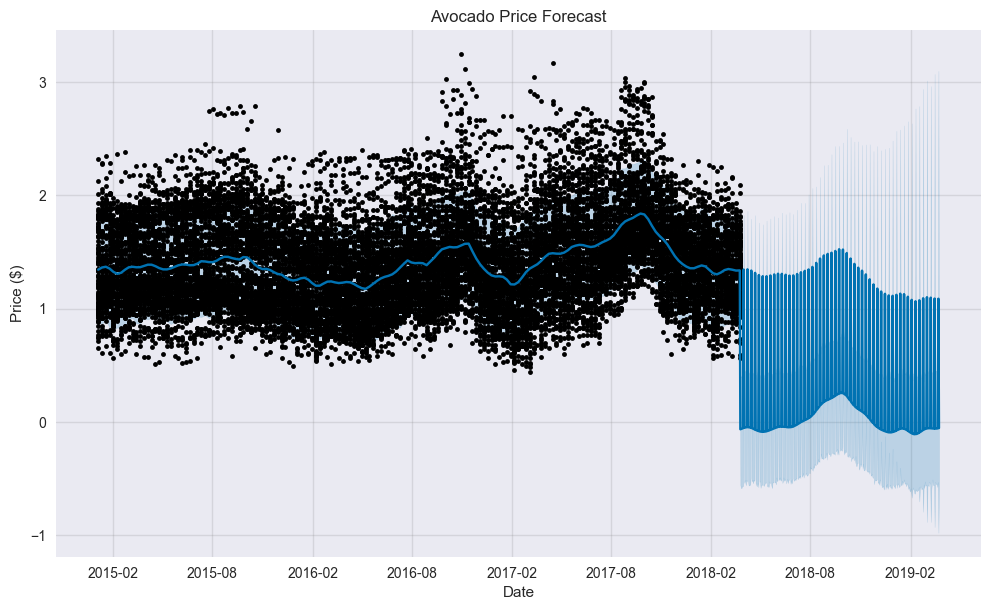

In [24]:
# Plot predictions
fig1 = model.plot(predictions)
plt.title('Avocado Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

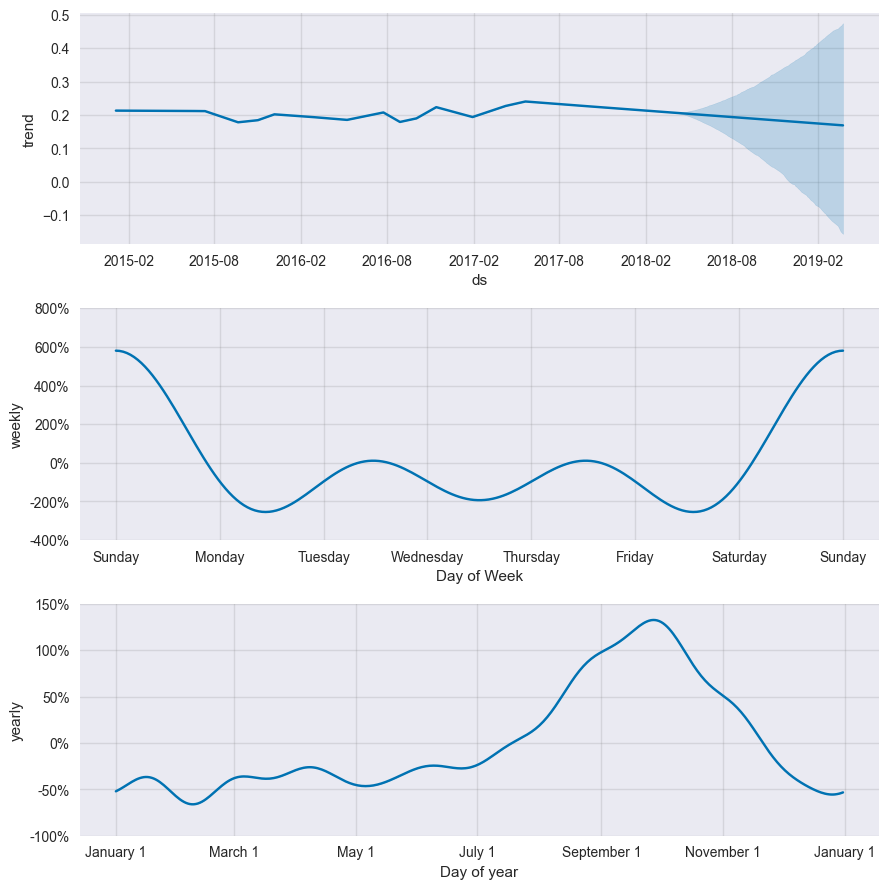

In [23]:
# Plot model components
fig2 = model.plot_components(predictions)
plt.show()


Model Performance Metrics:
--------------------------------------------------
RMSE: 0.3751 (Lower is better)
MAE:  0.3041 (Lower is better)
MAPE: 23.67% (Lower is better)
R2:   0.1322 (Closer to 1 is better)


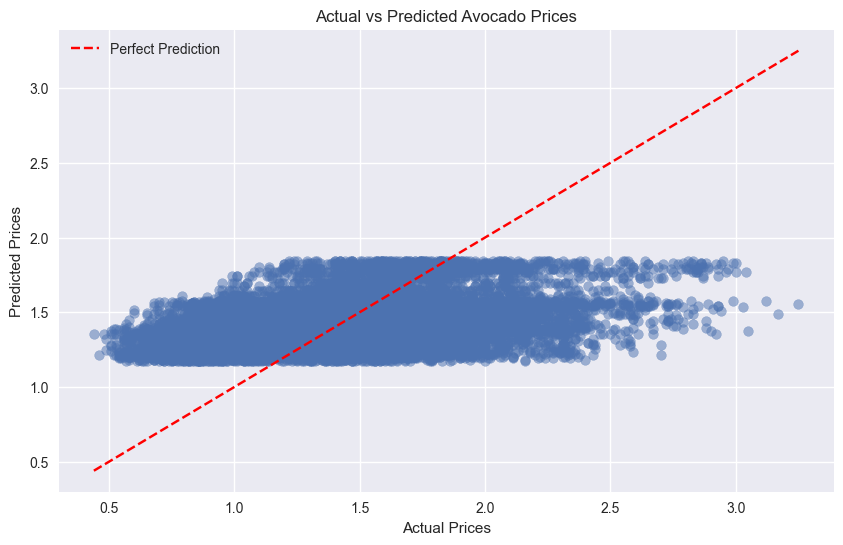

In [ ]:
#calculate the error of the code
def evaluate_model(actual, predicted):
    """
    Calculate and return error metrics for model evaluation.
    
    Parameters:
    actual (array-like): Actual values
    predicted (array-like): Predicted values
    
    Returns:
    dict: Dictionary containing various error metrics
    """
    # Convert inputs to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Basic metrics
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    return {
        'RMSE': rmse,  # Root Mean Square Error
        'MAE': mae,    # Mean Absolute Error
        'MAPE': mape,  # Mean Absolute Percentage Error
        'R2': r2       # R-squared score
    }

# Get predictions for historical dates and align the data
historical_predictions = predictions[predictions['ds'].isin(prophet_data['ds'])].sort_values('ds')
actual_values = prophet_data.copy().sort_values('ds')

# Create a merged dataframe to ensure perfect alignment
comparison_df = pd.merge(
    actual_values, 
    historical_predictions[['ds', 'yhat']], 
    on='ds', 
    how='inner'
)

# Now we have perfectly aligned data
metrics = evaluate_model(comparison_df['y'], comparison_df['yhat'])

# Print metrics with descriptions
print("\nModel Performance Metrics:")
print("-" * 50)
print(f"RMSE: {metrics['RMSE']:.4f} (Lower is better)")
print(f"MAE:  {metrics['MAE']:.4f} (Lower is better)")
print(f"MAPE: {metrics['MAPE']:.2f}% (Lower is better)")
print(f"R2:   {metrics['R2']:.4f} (Closer to 1 is better)")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['y'], comparison_df['yhat'], alpha=0.5)
plt.plot([comparison_df['y'].min(), comparison_df['y'].max()], 
         [comparison_df['y'].min(), comparison_df['y'].max()], 
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Avocado Prices')
plt.legend()
plt.grid(True)
plt.show()